In [37]:
# import pybullet as p

# import pybullet_data


# p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# First, let's make sure we start with a fresh new simulation.
# Otherwise, we can keep adding objects by running this cell over again.
p.resetSimulation()

In [39]:


# Load our simulation floor plane at the origin (0, 0, 0).
p.loadURDF('plane.urdf')

# Load an R2D2 droid at the position at 0.5 meters height in the z-axis.
r2d2 = p.loadURDF('urdf/1/bittle.urdf', [0, 0, 0.5])


# We can check the number of bodies we have in the simulation.
p.getNumBodies()




2

In [38]:
# First let's define a class for the JointInfo.
from dataclasses import dataclass

@dataclass
class Joint:
  index: int
  name: str
  type: int
  gIndex: int
  uIndex: int
  flags: int
  damping: float
  friction: float
  lowerLimit: float
  upperLimit: float
  maxForce: float
  maxVelocity: float
  linkName: str
  axis: tuple
  parentFramePosition: tuple
  parentFrameOrientation: tuple
  parentIndex: int

  def __post_init__(self):
    self.name = str(self.name, 'utf-8')
    self.linkName = str(self.linkName, 'utf-8')

# Let's analyze the R2D2 droid!
print(f"r2d2 unique ID: {r2d2}")
for i in range(p.getNumJoints(r2d2)):
  joint = Joint(*p.getJointInfo(r2d2, i))
  print(joint)

r2d2 unique ID: 1


In [41]:

# Set the gravity to Earth's gravity.
p.setGravity(0, 0, -9.807)

# Run the simulation for a fixed amount of steps.
while True :
    position, orientation = p.getBasePositionAndOrientation(r2d2)
    x, y, z = position
    roll, pitch, yaw = p.getEulerFromQuaternion(orientation)
    p.setJointMotorControl2(bodyUniqueId=1, jointIndex=3, controlMode=p.VELOCITY_CONTROL, targetVelocity = 3,force = 8000) 
#     print(f"{i:3}: x={x:0.10f}, y={y:0.10f}, z={z:0.10f}), roll={roll:0.10f}, pitch={pitch:0.10f}, yaw={yaw:0.10f}")
    
    
    
#     p.setJointMotorControl2(bodyUniqueId=1, jointIndex=4, controlMode=p.VELOCITY_CONTROL, targetVelocity = 3,force = 500) 
    p.setJointMotorControl2(bodyUniqueId=1, jointIndex=6, controlMode=p.VELOCITY_CONTROL, targetVelocity = 3,force = 8000) 

    p.stepSimulation()

error: GetBasePositionAndOrientation failed.

In [4]:
_link_name_to_index = {p.getBodyInfo(r2d2)[0].decode('UTF-8'):-1,}
        
for _id in range(p.getNumJoints(r2d2)):
	_name = p.getJointInfo(r2d2, _id)[12].decode('UTF-8')
	_link_name_to_index[_name] = _id
_link_name_to_index

{'base-frame-link': -1,
 'battery-link': 0,
 'cover-link': 1,
 'left-back-shoulder-link': 2,
 'left-back-knee-link': 3,
 'left-front-shoulder-link': 4,
 'left-front-knee-link': 5,
 'mainboard_link': 6,
 'imu_link': 7,
 'right-back-shoulder-link': 8,
 'right-back-knee-link': 9,
 'right-front-shoulder-link': 10,
 'right-front-knee-link': 11}

In [40]:
p.changeVisualShape(r2d2,-1,rgbaColor=[1,0,0,1])
p.changeVisualShape(r2d2,0,rgbaColor=[0.5,1,0,1])
p.changeVisualShape(r2d2,1,rgbaColor=[1,1,0,1])
p.changeVisualShape(r2d2,6,rgbaColor=[0,0.3,0.8,1])

p.changeVisualShape(r2d2,2,rgbaColor=[0,1,0,0.7])
p.changeVisualShape(r2d2,4,rgbaColor=[0,1,0,0.7])

p.changeVisualShape(r2d2,8,rgbaColor=[0,1,0,1])
p.changeVisualShape(r2d2,10,rgbaColor=[0,1,0,1])

p.changeVisualShape(r2d2,3,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,5,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,9,rgbaColor=[0.5,0.5,0.5,0.89])
p.changeVisualShape(r2d2,11,rgbaColor=[0.5,0.5,0.5,0.89])




rgba shape=(300, 320, 4), dtype=uint8


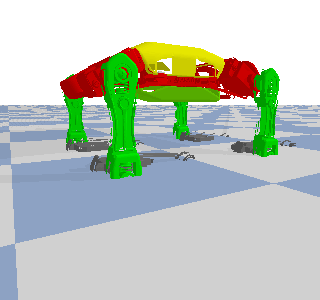

depth shape=(300, 320), dtype=float32, as values from 0.0 (near) to 1.0 (far)


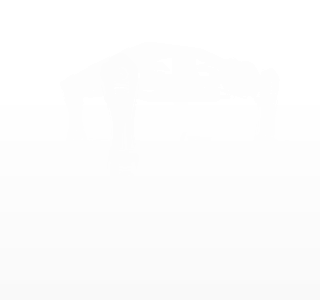

mask shape=(300, 320), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


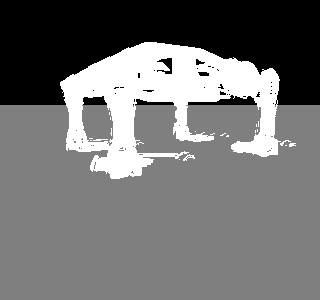

In [24]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 320
height = 300
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0],
        distance=2,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)
width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

In [7]:
# p.changeVisualShape(r2d2,-1,rgbaColor=[1,1,1,0])